In [ ]:
# Mount the Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the trained model from the Drive

drive_model_path = "/content/drive/MyDrive/models/distilbert_model" #drive path of the saved model

In [ ]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast

# Load the model from the google drive
model = DistilBertForSequenceClassification.from_pretrained(drive_model_path)

# Load the tokenizer as well for predictions
tokenizer = DistilBertTokenizerFast.from_pretrained(drive_model_path)



In [ ]:
import pandas as pd

# import the latest dataframe with reviews and sentiments
merged_df = pd.read_csv('/content/drive/MyDrive/merged_df.csv')

# See the first few rows
print(merged_df.head())

# print the length of the dataframe
print(len(merged_df))

                                         full_review sentiment
0  Kindle product far disappointed children love ...  positive
1  very fast great beginner experienced person bo...  positive
2  Beginner tablet for our 9 year old son. inexpe...  positive
3  Good!!! ive fire hd two weeks love tablet grea...  positive
4  Fantastic Tablet for kids bought grand daughte...  positive
47295


=========================== CLUSTERING ================================

In [ ]:
# Import required libraries

from google.colab import drive
from sentence_transformers import SentenceTransformer
from sklearn.cluster import MiniBatchKMeans
import numpy as np

# Load the sentence transformer model
model_name = 'all-MiniLM-L6-v2'     # lightweight and efficient
embedding_model = SentenceTransformer(model_name)

# Generate embeddings for the review text
# You can use a different column if `full_review` is not the correct one
print("Generating embeddings...")
embeddings = embedding_model.encode(merged_df['full_review'].tolist(), show_progress_bar=True)

# Determine the optimal number of clusters
# For MiniBatchKMeans, you can try different values for `n_clusters`
n_clusters = 5  # You can adjust this number (4-6) based on analysis

# Perform clustering using MiniBatchKMeans for efficiency
print(f"Clustering into {n_clusters} clusters...")
clustering_model = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clustering_model.fit(embeddings)

# Assign cluster labels back to the DataFrame
merged_df['cluster'] = clustering_model.labels_

print("Clustering complete. Inspecting cluster distribution:")
print(merged_df['cluster'].value_counts())

# To inspect the clusters, you can save the DataFrame or sample the results
# merged_df.to_csv('/content/drive/MyDrive/clustered_reviews.csv', index=False)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Generating embeddings...


Batches:   0%|          | 0/1478 [00:00<?, ?it/s]

Clustering into 5 clusters...
Clustering complete. Inspecting cluster distribution:
cluster
3    20920
1    11349
4     6698
2     4895
0     3433
Name: count, dtype: int64


In [ ]:
# Printing Sample Reviews by Cluster

for cluster_id in sorted(merged_df['cluster'].unique()):
    print(f"\n--- Sample Reviews from Cluster {cluster_id} ---")

    # Filter the DataFrame for the current cluster and sample 10 reviews
    cluster_reviews = merged_df[merged_df['cluster'] == cluster_id]

    # Display the first 10 reviews for inspection
    if len(cluster_reviews) > 10:
        sample_reviews = cluster_reviews.sample(10)['full_review']
    else:
        sample_reviews = cluster_reviews['full_review']

    for i, review in enumerate(sample_reviews, 1):
        print(f"{i}. {review[:150]}...") # Print the first 150 characters


--- Sample Reviews from Cluster 0 ---
1. Four Stars excelente...
2. Five Stars works problems...
3. One Star alot batteries dead weak...
4. Five Stars great good price...
5. Five Stars nice product good price...
6. Five Stars great value quality would highly recommend...
7. Five Stars great value order...
8. One Star love batteriesthanks...
9. Five Stars seem work well battery ive tried...
10. Five Stars cheep work well...

--- Sample Reviews from Cluster 1 ---
1. My first tablet nice tablet great price purchased per black friday sale online...
2. Great tablet great tablet year old good ipad close runner much less expensive...
3. Pefect better reading phone traditional tablet...
4. Low cost Tablet tablet great young kids gift ideas...
5. Great Tablet rd kindle pleased ease use features amazon offer suggested brother get one kids happy actually uses much kids looking buy one suggest buy...
6. Great got gift mother great little starter tablet anyone wanting surf web play games also like

In [ ]:
# Define the mapping from cluster ID to the new meta-category name
cluster_to_category = {
    0: "General Batteries",
    1: "E-readers & Tablets",
    2: "Branded Batteries",
    3: "Miscellaneous Electronics",
    4: "Smart Home Devices"
}

# Create a new 'meta_category' column in your DataFrame by mapping the cluster IDs
merged_df['meta_category'] = merged_df['cluster'].map(cluster_to_category)

# Display the distribution of the new meta-categories
print("Distribution of Meta-Categories:")
print(merged_df['meta_category'].value_counts())

# Display the DataFrame head with the new column (optional, for verification)
print("\nDataFrame head with new 'meta_category' column:")
print(merged_df.head())

Distribution of Meta-Categories:
meta_category
Miscellaneous Electronics    20920
E-readers & Tablets          11349
Smart Home Devices            6698
Branded Batteries             4895
General Batteries             3433
Name: count, dtype: int64

DataFrame head with new 'meta_category' column:
                                         full_review sentiment  cluster  \
0  Kindle product far disappointed children love ...  positive        3   
1  very fast great beginner experienced person bo...  positive        3   
2  Beginner tablet for our 9 year old son. inexpe...  positive        1   
3  Good!!! ive fire hd two weeks love tablet grea...  positive        1   
4  Fantastic Tablet for kids bought grand daughte...  positive        1   

               meta_category  
0  Miscellaneous Electronics  
1  Miscellaneous Electronics  
2        E-readers & Tablets  
3        E-readers & Tablets  
4        E-readers & Tablets  


In [ ]:
# Define the save path
save_categorised_reviews = '/content/drive/MyDrive/amazon_reviews_categorized.csv'

# Save the DataFrame with the new meta-category column
merged_df.to_csv(save_categorised_reviews, index=False)

# Print a confirmation message using the defined path variable
print(f"DataFrame successfully saved to {save_categorised_reviews}")

DataFrame successfully saved to /content/drive/MyDrive/amazon_reviews_categorized.csv


/tmp/ipython-input-3017710960.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='meta_category', data=merged_df, order=merged_df['meta_category'].value_counts().index, palette='viridis')


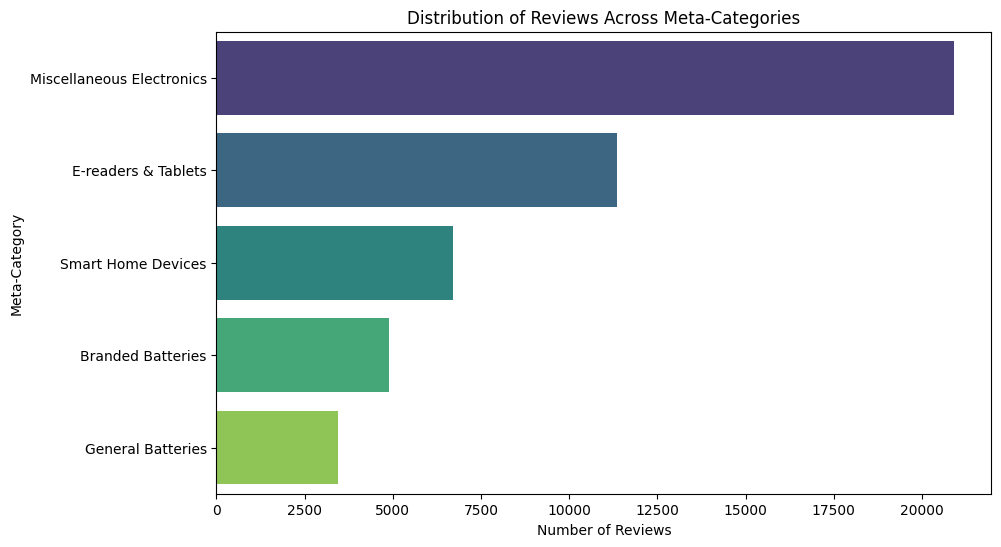

In [ ]:
# Visualisation of review distribution across Meta-categories

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(y='meta_category', data=merged_df, order=merged_df['meta_category'].value_counts().index, palette='viridis')
plt.title('Distribution of Reviews Across Meta-Categories')
plt.xlabel('Number of Reviews')
plt.ylabel('Meta-Category')
plt.show()


Sentiment Distribution within each Meta-Category (%):
sentiment                   negative   neutral   positive
meta_category                                            
Branded Batteries          13.401430  5.209397  81.389173
E-readers & Tablets         2.299762  5.586395  92.113843
General Batteries           5.854937  4.922808  89.222255
Miscellaneous Electronics   2.968451  3.824092  93.207457
Smart Home Devices          1.552702  3.209913  95.237384


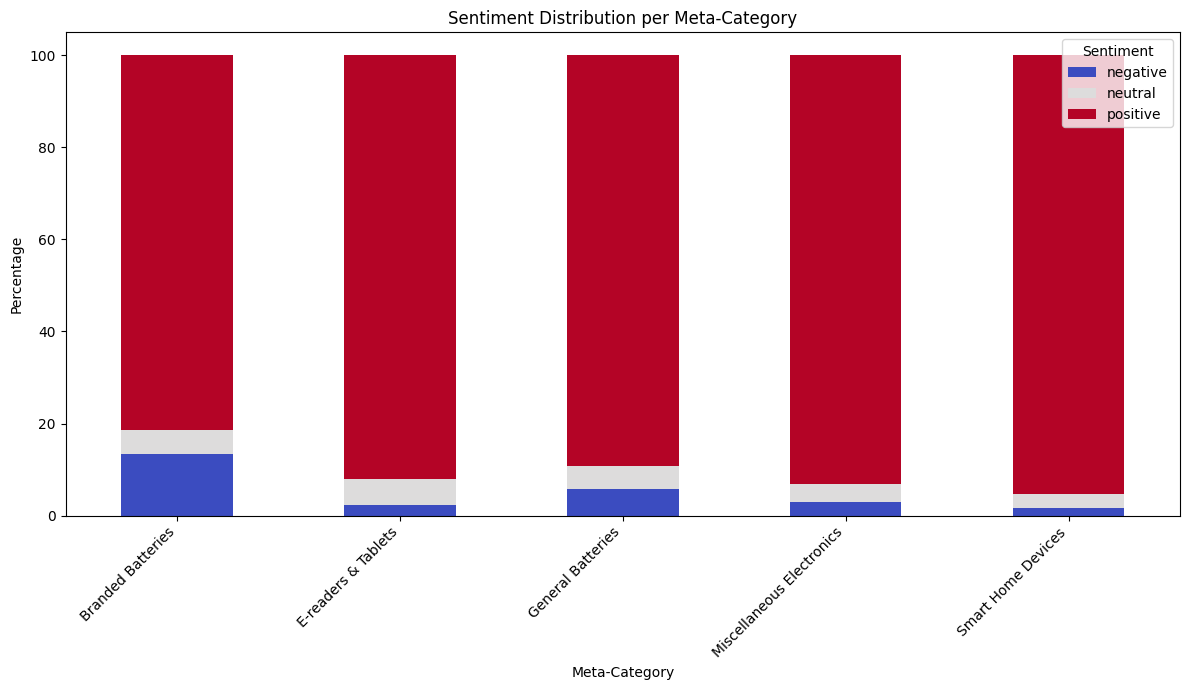

In [ ]:
# Create a cross-tabulation of meta_category and sentiment
sentiment_by_category = pd.crosstab(merged_df['meta_category'], merged_df['sentiment'], normalize='index') * 100

print("\nSentiment Distribution within each Meta-Category (%):")
print(sentiment_by_category)

# Visualize the sentiment distribution per Meta-category
sentiment_by_category.plot(kind='bar', figsize=(12, 7), stacked=True, cmap='coolwarm')
plt.title('Sentiment Distribution per Meta-Category')
plt.xlabel('Meta-Category')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

/tmp/ipython-input-322805014.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='meta_category', y='review_length', data=merged_df, palette='muted')


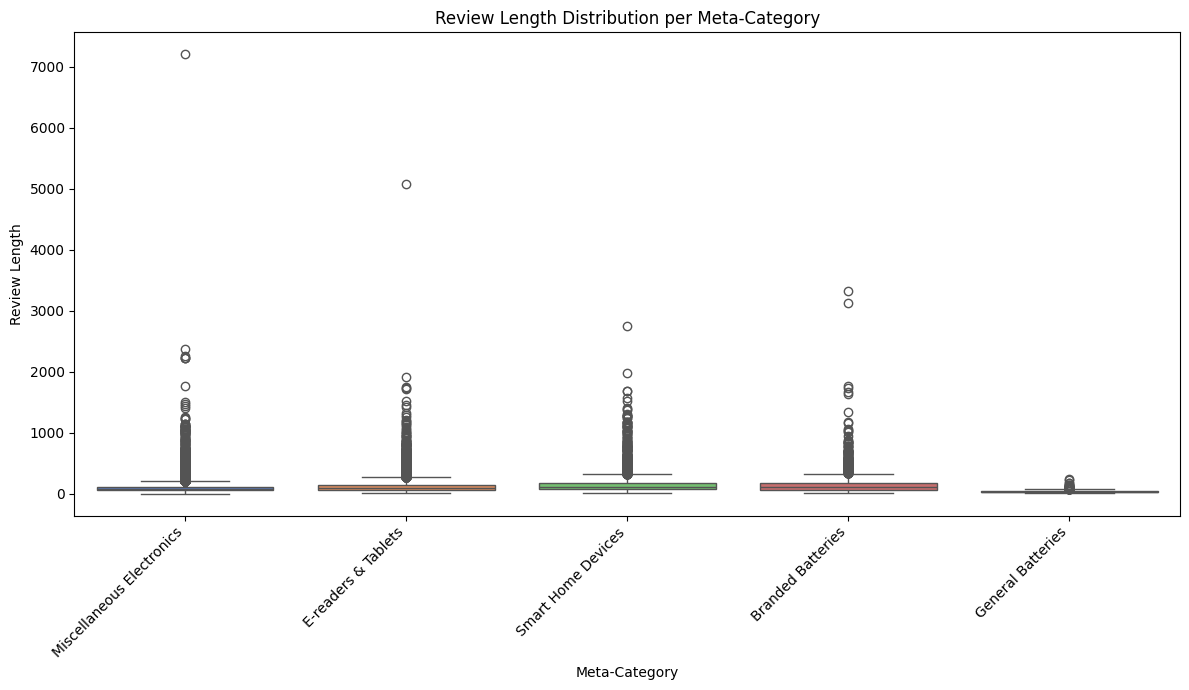

In [ ]:
# Add review_length column if not already present
if 'review_length' not in merged_df.columns:
    merged_df['review_length'] = merged_df['full_review'].apply(len)

plt.figure(figsize=(12, 7))
sns.boxplot(x='meta_category', y='review_length', data=merged_df, palette='muted')
plt.title('Review Length Distribution per Meta-Category')
plt.xlabel('Meta-Category')
plt.ylabel('Review Length')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# save the csv file updated with clusters and meta=categories
save_categoriese_reviews_final = '/content/drive/MyDrive/amazon_reviews_clustered_and_categorized.csv'
merged_df.to_csv(save_categoriese_reviews_final, index=False)

print(f"\nFinal DataFrame with meta-categories saved to: {save_categoriese_reviews_final}")


Final DataFrame with meta-categories saved to: /content/drive/MyDrive/amazon_reviews_clustered_and_categorized.csv


In [ ]:
#Quick Check

# See first few rows with new columns
print(merged_df.head())

# Check only the new columns
print(merged_df[['cluster', 'meta_category']].head())

# Get unique cluster values
print(merged_df['cluster'].unique())

# Get unique meta-categories
print(merged_df['meta_category'].unique())

# See how many items in each cluster
print(merged_df['cluster'].value_counts())

# See how many items in each meta-category
print(merged_df['meta_category'].value_counts())

                                         full_review sentiment  cluster  \
0  Kindle product far disappointed children love ...  positive        3   
1  very fast great beginner experienced person bo...  positive        3   
2  Beginner tablet for our 9 year old son. inexpe...  positive        1   
3  Good!!! ive fire hd two weeks love tablet grea...  positive        1   
4  Fantastic Tablet for kids bought grand daughte...  positive        1   

               meta_category  review_length  
0  Miscellaneous Electronics             95  
1  Miscellaneous Electronics             61  
2        E-readers & Tablets            107  
3        E-readers & Tablets            362  
4        E-readers & Tablets            377  
   cluster              meta_category
0        3  Miscellaneous Electronics
1        3  Miscellaneous Electronics
2        1        E-readers & Tablets
3        1        E-readers & Tablets
4        1        E-readers & Tablets
[3 1 4 2 0]
['Miscellaneous Electronics' 'E-r